# Analisis basico de datos corona virus Guatemala 2020

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [40]:
dir_pacientes = '../data/pacientes.csv'
pacientes = pd.read_csv(dir_pacientes, header = 0, parse_dates = True)

# dar formato a fechas
cols_fecha = ["fecha_nacimiento","fecha_confirmacion", "fecha_recuperacion", "fecha_desceso"]
for col in cols_fecha:
    pacientes[col] = pd.to_datetime(pacientes[col], yearfirst = True)

# mostrar columnas y tipo de dato
print(pacientes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2 non-null      int64         
 1   sexo                2 non-null      object        
 2   fecha_nacimiento    2 non-null      datetime64[ns]
 3   edad                2 non-null      int64         
 4   pais                2 non-null      object        
 5   departamento        2 non-null      object        
 6   enfermedad          2 non-null      object        
 7   grupo               2 non-null      int64         
 8   razon_infeccion     2 non-null      object        
 9   infectado_por       2 non-null      int64         
 10  fecha_confirmacion  2 non-null      datetime64[ns]
 11  fecha_recuperacion  0 non-null      datetime64[ns]
 12  fecha_desceso       1 non-null      datetime64[ns]
 13  estado              2 non-null      int64         
 14

In [41]:
# mostrar algunos datos
print(pacientes.head())

   id sexo fecha_nacimiento  edad       pais departamento   enfermedad  grupo  \
0   1    m       1993-01-01    27  guatemala    guatemala  desconocido      1   
1   2    m       1935-01-01    85  guatemala    guatemala  desconocido      2   

                          razon_infeccion  infectado_por fecha_confirmacion  \
0  Viaje Italia/Madrid/Bogota/SanSalvador            -99         2020-03-13   
1              Viaje Espana/Suiza/Francia            -99         2020-03-15   

  fecha_recuperacion fecha_desceso  estado  \
0                NaT           NaT       0   
1                NaT    2020-03-15       2   

                                              fuente  
0  https://web.archive.org/web/20200315072155/htt...  
1  https://scontent-gmp1-1.xx.fbcdn.net/v/t1.0-9/...  


## Datos cumulativos y diarios 

Se muestran la cantidad de pacientes confirmados, recuperados y fallecidos a lo largo del tiempo.

2020-03-13    1
2020-03-15    1
Name: fecha_confirmacion, dtype: int64


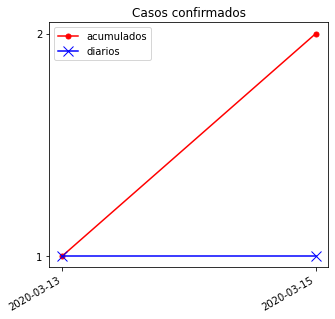

In [58]:
fig1 = plt.figure(figsize=(5,5))
fig1ax1 = fig1.add_subplot(1,1,1)
fig1ax1.set_title('Casos confirmados')
confirmados = pacientes['fecha_confirmacion'].value_counts()
confirmados.cumsum().plot(ax = fig1ax1, color = 'r', label = 'acumulados', marker='.',markersize=10)
confirmados.plot(ax = fig1ax1, color = 'b', label = 'diarios', marker='x',markersize=10)
fig1ax1.set_xticks(confirmados.index.to_list())
fig1ax1.set_yticks(range(min(confirmados),max(confirmados)+2))
fig1ax1.legend(loc="best")

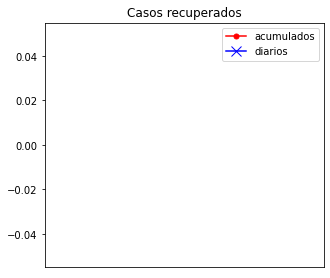

In [63]:
fig2 = plt.figure(figsize=(5,5))
fig2ax1 = fig2.add_subplot(1,1,1)
fig2ax1.set_title('Casos recuperados')
recuperados = pacientes['fecha_recuperacion'].value_counts()
recuperados.cumsum().plot(ax = fig2ax1, color = 'r', label = 'acumulados', marker='.',markersize=10)
recuperados.plot(ax = fig2ax1, color = 'b', label = 'diarios', marker='x',markersize=10)
fig2ax1.set_xticks(recuperados.index.to_list())
#fig2ax1.set_yticks((range(min(recuperados),max(recuperados)+2)))
fig2ax1.legend(loc = "best")

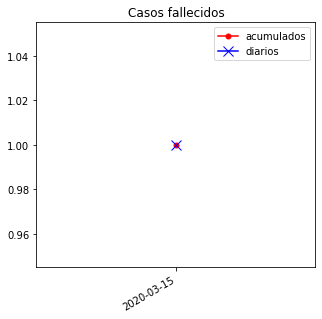

In [64]:
fig3 = plt.figure(figsize=(5,5))
fig3ax1 = fig3.add_subplot(1,1,1)
fig3ax1.set_title('Casos fallecidos')
fallecidos = pacientes['fecha_desceso'].value_counts()
fallecidos.cumsum().plot(ax = fig3ax1, color = 'r', label = 'acumulados', marker='.',markersize=10)
fallecidos.plot(ax = fig3ax1, color = 'b', label = 'diarios', marker='x',markersize=10)
fig3ax1.set_xticks(fallecidos.index.to_list())
fig2ax1.set_yticks((range(min(fallecidos),max(fallecidos)+2)))
fig3ax1.legend(loc = 'best')

## Datos por sexo 
Pacientes confirmados, recuperados y fallecidos, agregados por sexo.

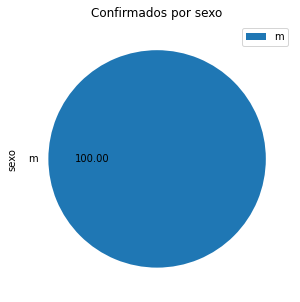

In [45]:
# Obtener casos confirmados
confirmados = pacientes[[ not pd.isna(i) for i in pacientes['fecha_confirmacion']]]
confirmados['sexo'].value_counts().plot.pie(y='sexo', legend = True, autopct='%.2f', figsize = (5,5), title = 'Confirmados por sexo')

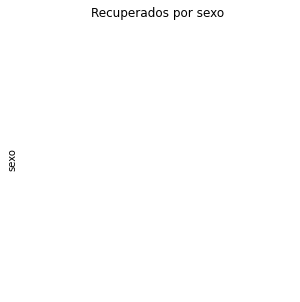

In [46]:
recuperados = pacientes[[ not pd.isna(i) for i in pacientes['fecha_recuperacion']]]
recuperados['sexo'].value_counts().plot.pie(y='sexo', legend = True, autopct='%.2f', figsize = (5,5), title = 'Recuperados por sexo')

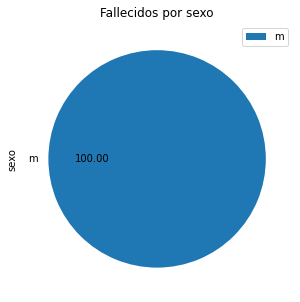

In [47]:
fallecidos = pacientes[[ not pd.isna(i) for i in pacientes['fecha_desceso']]]
fallecidos['sexo'].value_counts().plot.pie(y='sexo', legend = True, autopct='%.2f', figsize = (5,5), title = 'Fallecidos por sexo')